#Task 1: Set Up Python Environment

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import math

#Task 2: Load and Explore the Dataset

In [ ]:
file = 'CarRentalData.csv'
df = pd.read_csv(file)

In [ ]:
df.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5776 non-null   object 
 1   rating              5350 non-null   float64
 2   renterTripsTaken    5851 non-null   int64  
 3   reviewCount         5851 non-null   int64  
 4   location.city       5851 non-null   object 
 5   location.country    5851 non-null   object 
 6   location.latitude   5851 non-null   float64
 7   location.longitude  5851 non-null   float64
 8   location.state      5851 non-null   object 
 9   owner.id            5851 non-null   int64  
 10  rate.daily          5851 non-null   int64  
 11  vehicle.make        5851 non-null   object 
 12  vehicle.model       5851 non-null   object 
 13  vehicle.type        5851 non-null   object 
 14  vehicle.year        5851 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 685.8+

In [ ]:
df.describe()

,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year
count,5350.000000,5851.000000,5851.000000,5851.000000,5851.000000,5.851000e+03,5851.000000,5851.000000
mean,4.920325,33.477354,28.454794,35.582889,-99.632773,6.034830e+06,93.691506,2015.340113
std,0.182425,41.898954,35.136113,6.431408,20.391476,4.646022e+06,96.080920,4.050813
min,1.000000,0.000000,0.000000,21.272565,-158.165693,5.105000e+03,20.000000,1955.000000
25%,4.900000,5.000000,4.000000,30.453623,-117.158285,1.917451e+06,45.000000,2014.000000
50%,5.000000,18.000000,16.000000,35.554502,-95.673319,4.968749e+06,69.000000,2016.000000
75%,5.000000,46.000000,39.000000,39.996864,-81.538631,9.657496e+06,110.000000,2018.000000
max,5.000000,395.000000,321.000000,64.893610,-68.823637,1.581088e+07,1500.000000,2020.000000


#Task 3: Data Cleaning and Preprocessing


###Deleting Redundant Columns

In [ ]:
keep = ['fuelType', 'rating', 'reviewCount','location.city', 'location.state',
        'rate.daily', 'vehicle.make', 'vehicle.model', 'vehicle.type', 'vehicle.year' ]

drop = ['location.country', 'location.latitude', 'location.longitude', 'owner.id',
        'renterTripsTaken']

df = df.drop(columns = drop, axis=1)

###Renaming Columns


In [ ]:
df = df.rename(columns={'vehicle.make':'make', 'vehicle.model':'model', 'vehicle.type':'type',
                'vehicle.year':'yearCreated', 'location.state':'state', 'location.city': 'city',
                'rate.daily':'dailyRate'})

###Cleaning Columns

In [ ]:
df.select_dtypes(exclude='number')

,fuelType,city,state,make,model,type
0,ELECTRIC,Seattle,WA,Tesla,Model X,suv
1,ELECTRIC,Tijeras,NM,Tesla,Model X,suv
2,HYBRID,Albuquerque,NM,Toyota,Prius,car
3,GASOLINE,Albuquerque,NM,Ford,Mustang,car
4,GASOLINE,Albuquerque,NM,Chrysler,Sebring,car
...,...,...,...,...,...,...
5846,GASOLINE,Honolulu,HI,Chevrolet,Cruze,car
5847,HYBRID,Aiea,HI,Lexus,HS 250h,car
5848,GASOLINE,Kailua,HI,smart,fortwo,car
5849,GASOLINE,Waipahu,HI,GMC,Savana,van


In [ ]:
#ensures value of string data types follow similar format
df['fuelType'] = df['fuelType'].str.upper()
df['city'] = df['city'].str.lower()
df['state'] = df['state'].str.upper()
df['make'] = df['make'].str.lower()
df['model'] = df['model'].str.lower()
df['type'] = df['type'].str.lower()

###Dropping Duplicates

In [ ]:
df = df.drop_duplicates()

#verifies no more duplicate values
df.duplicated().value_counts()

,count
False,5840


###Handling Missing *Values*

In [ ]:
df.isnull().sum()

,0
fuelType,73
rating,499
reviewCount,0
city,0
state,0
dailyRate,0
make,0
model,0
type,0
yearCreated,0


In [ ]:
#replaces missing 'rating' values with the median (instead of mean because of outliers)
df['rating'].fillna(df['rating'].median(), inplace=True)

<ipython-input-15-9f13ee02423d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].median(), inplace=True)


In [ ]:
#fills 'fuelType' missing values with the mode
df['fuelType'].fillna(df['fuelType'].mode()[0], inplace=True)

<ipython-input-16-091f8849fb8b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuelType'].fillna(df['fuelType'].mode()[0], inplace=True)


###Assigns one of the fours regions of the US to each data point

In [ ]:
states = df['state']
regions = {'northeast' :['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT'],
           'midwest' : ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'],
           'south' : ['AL', 'AR', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV'],
           'west' : ['AK', 'AZ', 'CA', 'CO', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY', 'HI']}

#list of regions for all entries
region = []

#assigns region based on state
for state in states:
  if state in regions['northeast']:
    region.append('northeast')
  elif state in regions['midwest']:
    region.append('midwest')
  elif state in regions['south']:
    region.append('south')
  elif state in regions['west']:
    region.append('west')
df['region'] = pd.Series(data=region)

In [ ]:
df[df['region'].isnull()]

#for some reason region not assigned for all entries where the state is 'HI'

,fuelType,rating,reviewCount,city,state,dailyRate,make,model,type,yearCreated,region
5828,GASOLINE,4.97,36,honolulu,HI,45,audi,a4,car,2014,NaN
5829,GASOLINE,5.00,12,pearl city,HI,46,dodge,charger,car,2012,NaN
5830,GASOLINE,5.00,13,honolulu,HI,62,mini,cooper coupe,car,2014,NaN
5831,GASOLINE,5.00,3,wahiawa,HI,48,honda,accord sedan,car,2019,NaN
5832,GASOLINE,4.84,58,honolulu,HI,35,jeep,patriot,suv,2012,NaN
5833,GASOLINE,5.00,15,mililani,HI,54,dodge,grand caravan,minivan,2013,NaN
5834,GASOLINE,5.00,19,honolulu,HI,65,jeep,wrangler,suv,2015,NaN
5835,GASOLINE,4.94,31,honolulu,HI,60,mazda,mx-5 miata,car,2008,NaN
5836,GASOLINE,5.00,5,honolulu,HI,65,nissan,rogue,suv,2016,NaN
5837,GASOLINE,5.00,0,ewa beach,HI,35,jeep,cherokee,suv,2015,NaN


In [ ]:
#sets the region to 'west' for all null region values(where state is 'HI')
df['region'].fillna('west', inplace=True)

<ipython-input-19-61b03fb61f52>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['region'].fillna('west', inplace=True)


In [ ]:
#verifies no more missing values
df.isnull().sum()

,0
fuelType,0
rating,0
reviewCount,0
city,0
state,0
dailyRate,0
make,0
model,0
type,0
yearCreated,0


#Task 4: Exploratory Data Analysis (EDA)

In [ ]:
df

,fuelType,rating,reviewCount,city,state,dailyRate,make,model,type,yearCreated,region
0,ELECTRIC,5.00,12,seattle,WA,135,tesla,model x,suv,2019,west
1,ELECTRIC,5.00,1,tijeras,NM,190,tesla,model x,suv,2018,west
2,HYBRID,4.92,24,albuquerque,NM,35,toyota,prius,car,2012,west
3,GASOLINE,5.00,20,albuquerque,NM,75,ford,mustang,car,2018,west
4,GASOLINE,5.00,1,albuquerque,NM,47,chrysler,sebring,car,2010,west
...,...,...,...,...,...,...,...,...,...,...,...
5846,GASOLINE,5.00,27,honolulu,HI,33,chevrolet,cruze,car,2017,west
5847,HYBRID,5.00,16,aiea,HI,49,lexus,hs 250h,car,2010,west
5848,GASOLINE,4.94,17,kailua,HI,35,smart,fortwo,car,2013,west
5849,GASOLINE,5.00,0,waipahu,HI,77,gmc,savana,van,2015,west


##1. Car Models Popularity

####Which car makes and models are rented most frequently?


*   The number one most rented make and model is the Tesla, Model 3 which is significant higher compared to the other top models.



In [ ]:
#groups data by make and model, order by count
modelMakePopularity = pd.DataFrame(df.groupby(by=['make', 'model']).size().sort_values(ascending=False))
modelMakePopularity.rename(columns={0:'count'}, inplace=True)
modelMakePopularity

count
make     model                 
tesla    model 3            331
ford     mustang            152
tesla    model s            130
jeep     wrangler           123
tesla    model x            114
...                         ...
cadillac ct6                  1
         ats coupe            1
infiniti g37                  1
buick    regal sportback      1
ford     focus rs             1

[522 rows x 1 columns]

In [ ]:
#strips the parentheses from modelMakePopularity index
X = [str(i).strip("()") for i in modelMakePopularity.head(5).index]

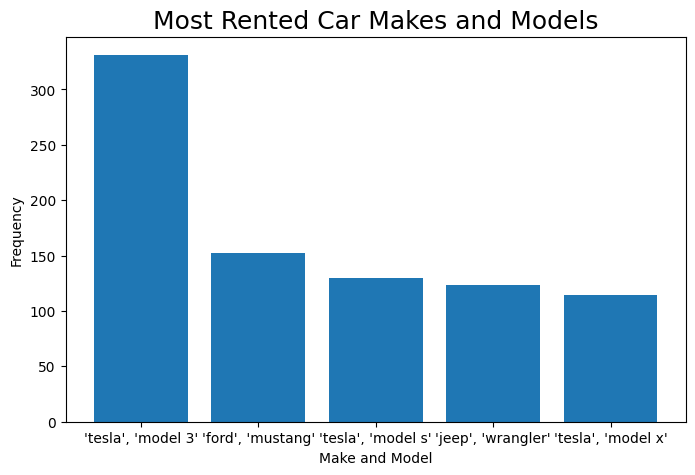

In [ ]:
#creates bar chart of the five most rented makes and models
plt.figure(figsize=(8, 5))
plt.bar(X, height=modelMakePopularity['count'].head(5))
plt.rc('font', size=15)
plt.title("Most Rented Car Makes and Models")
plt.rc('font', size=10)
plt.xlabel('Make and Model')
plt.ylabel('Frequency')
plt.show()

##2. Price Trends

####What are the average rental prices for different car models and fuel types (e.g., electric, gasoline, hybrid)?

In [ ]:
#groups data by model and fuel type and finds the daily rate
modelFuelPrice = pd.DataFrame(df.groupby(by=['model', 'fuelType'])['dailyRate'].mean())
modelFuelPrice

dailyRate
model                fuelType            
1 series             GASOLINE   72.666667
124 convertible 2000 GASOLINE  110.000000
124 spider           GASOLINE   70.500000
1500                 DIESEL     85.333333
                     GASOLINE   70.750000
...                                   ...
yaris                GASOLINE   30.711111
yaris ia             GASOLINE   40.750000
yukon                GASOLINE   89.857143
yukon xl             GASOLINE  122.727273
z4                   GASOLINE   79.368421

[579 rows x 1 columns]

####Is there a significant price difference between electric, hybrid, and gasoline vehicles?


*   There average price for gasoline(\~88) and hybric(\~84) vehicles are pretty similar, however there is a significant different compared to the price of electric cars(\~142).



In [ ]:
#finds the average daily rate by fuel type
avgFuelPrice = pd.DataFrame(df.groupby('fuelType')['dailyRate'].mean())
avgFuelPrice

,dailyRate
fuelType,
DIESEL,92.885714
ELECTRIC,141.967846
GASOLINE,88.142593
HYBRID,84.664234


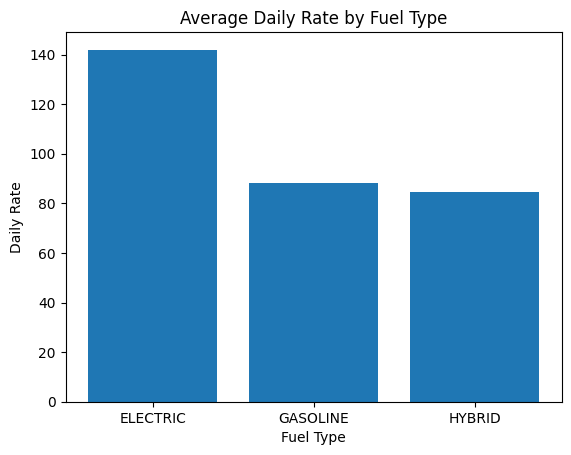

In [ ]:
#displays average price between electric, hybrid and gasoline vehicles
avgFuelPrice.drop('DIESEL', axis=0, inplace=True)
plt.bar(avgFuelPrice.index, avgFuelPrice['dailyRate'])
plt.title('Average Daily Rate by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Daily Rate')

plt.show()

#entry for 'DIESEL' was dropped to better focus on the fuel types asked in the question and easier comparision

##3. Geographic Trends

####Which cities have the highest demand for electric car?


*   Last Vegas and San Diego have the highest demand for electric cars at a count of 34.



In [ ]:
#selects all eletric cars then find the values count for each city
electricCars = df[df['fuelType'] == 'ELECTRIC']
electricCarCity = pd.DataFrame(electricCars['city'].value_counts())
electricCarCity.head(10)

,count
city,
las vegas,34
san diego,34
portland,16
los angeles,12
orlando,12
denver,11
san jose,11
jersey city,11
san antonio,10


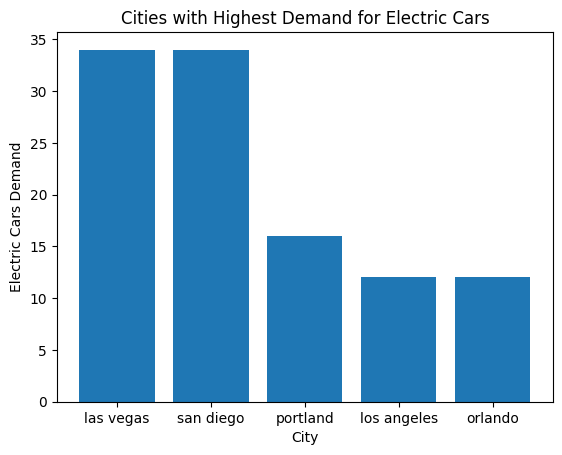

In [ ]:
#shows top five cities with highest demand for electric cars
plt.bar(electricCarCity.head(5).index, electricCarCity.head(5)['count'])
plt.title('Cities with Highest Demand for Electric Cars')
plt.xlabel('City')
plt.ylabel('Electric Cars Demand')
plt.show()

####Are specific vehicle types more popular in certain regions


*   No. Overrall, the distribution of vehicle types is similar across all regions. Cars are the most common type, followed by SUV, minivans, trucks and vans, in that order.


In [ ]:
regionAndType = pd.DataFrame(df.groupby(by=['region', 'type']).size().reset_index())
regionAndType.rename(columns={0:'count'}, inplace=True)
regionAndType

,region,type,count
0,midwest,car,390
1,midwest,minivan,27
2,midwest,suv,149
3,midwest,truck,21
4,midwest,van,5
5,northeast,car,263
6,northeast,minivan,20
7,northeast,suv,138
8,northeast,truck,12
9,northeast,van,2


In [ ]:
regionAndType_pivot = regionAndType.pivot(index='region', columns='type', values='count')
regionAndType_pivot

type,car,minivan,suv,truck,van
region,,,,,
midwest,390,27,149,21,5
northeast,263,20,138,12,2
south,1533,77,611,66,23
west,1467,106,814,92,24


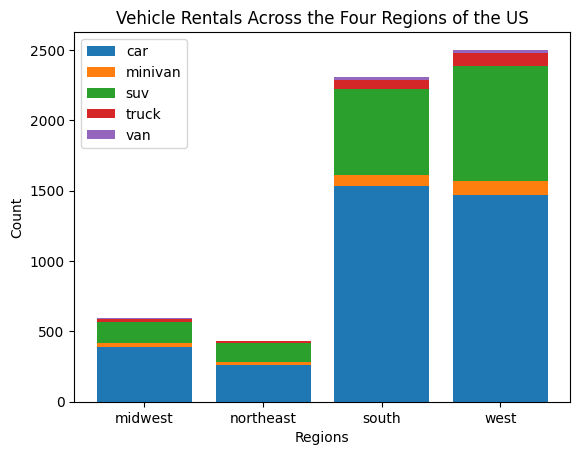

In [ ]:
#display distribution of vehicle type across the four regions
plt.bar(x=regionAndType_pivot.index, height=regionAndType_pivot['car'], label='car')
plt.bar(x=regionAndType_pivot.index, height=regionAndType_pivot['minivan'], bottom=regionAndType_pivot['car'], label='minivan')
plt.bar(x=regionAndType_pivot.index, height=regionAndType_pivot['suv'], bottom=regionAndType_pivot['car'] + regionAndType_pivot['minivan'], label='suv')
plt.bar(x=regionAndType_pivot.index, height=regionAndType_pivot['truck'], bottom=regionAndType_pivot['car'] + regionAndType_pivot['minivan'] + regionAndType_pivot['suv'], label='truck')
plt.bar(x=regionAndType_pivot.index, height=regionAndType_pivot['van'], bottom= regionAndType_pivot['car'] + regionAndType_pivot['minivan'] + regionAndType_pivot['suv'] + regionAndType_pivot['truck'], label='van')
plt.legend(loc='upper left')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.title('Vehicle Rentals Across the Four Regions of the US')
plt.show()

##4. Revenue Generation

####Which car models generate the most revenue per rental day on average?


*   Model 3 generates the most revenue, followed by Model X and Model S.



In [ ]:
#finds average daily rate for each model
avgPrice = pd.DataFrame(df.groupby('model')['dailyRate'].mean())
avgPrice

,dailyRate
model,
1 series,72.666667
124 convertible 2000,110.000000
124 spider,70.500000
1500,74.727273
2,40.666667
...,...
yaris,30.711111
yaris ia,40.750000
yukon,89.857143


In [ ]:
#calculates the count for each model
count = pd.DataFrame(df['model'].value_counts())
count

,count
model,
model 3,331
mustang,152
model s,130
wrangler,123
model x,114
...,...
tt rs,1
rx 350l,1
evora 400,1


In [ ]:
#calculates the revenue (price per unit * quantity)
priceCount = pd.concat([avgPrice, count], axis=1)
priceCount['revenue'] = priceCount['dailyRate'] * priceCount['count']
priceCount = priceCount.sort_values(by=['revenue'], ascending=False)
priceCount

,dailyRate,count,revenue
model,,,
model 3,128.317221,331,42473.0
model x,200.666667,114,22876.0
model s,136.369231,130,17728.0
corvette,186.435897,78,14542.0
mustang,88.026316,152,13380.0
...,...,...,...
matrix,27.000000,1,27.0
impala limited,27.000000,1,27.0
sky,27.000000,1,27.0


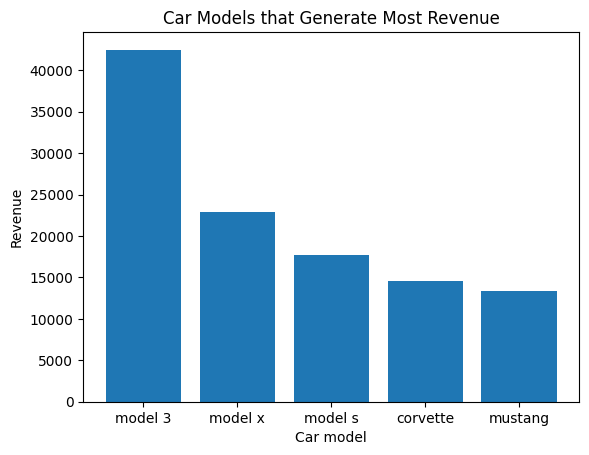

In [ ]:
#top five models that generate the most revenue
plt.bar(priceCount.head(5).index, priceCount.head(5)['revenue'])
plt.xlabel('Car model')
plt.ylabel('Revenue')
plt.title('Car Models that Generate Most Revenue')
plt.show()

##5. Customer Behavior

####Is there a correlation between the number of reviews and the average rental rating?


*   No, there is no correlation between the two.



In [ ]:
df['reviewCount'].corr(df['rating'])

-0.06954424118765917

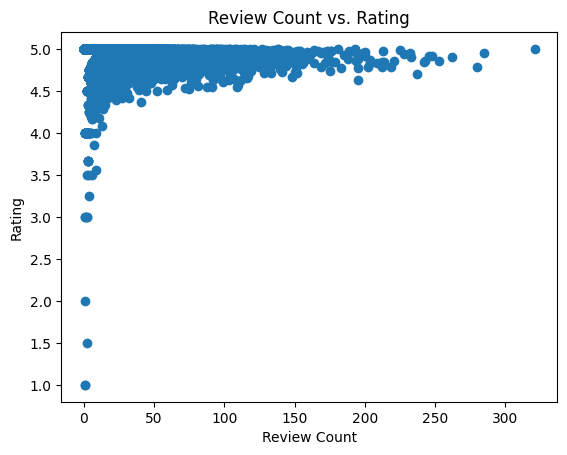

In [ ]:
plt.scatter(df['reviewCount'], df['rating'])
plt.title('Review Count vs. Rating')
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.show()

#Task 5: yearCreated and dailyRate Linear Regression

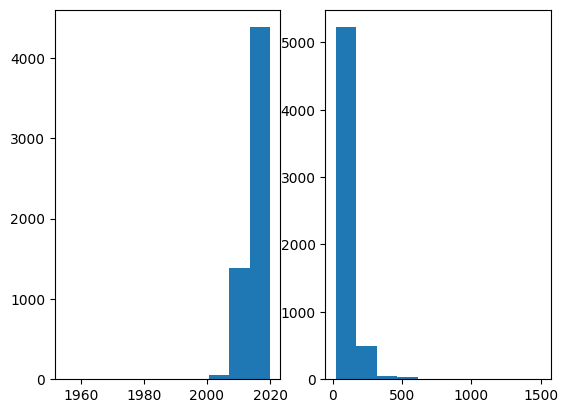

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(df['yearCreated'])
ax[1].hist(df['dailyRate'])
plt.show()

#not normaly distributed, z-score not suitable for handling outliers

In [ ]:
yearAndRate = df[['yearCreated', 'dailyRate']]

##Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
X = yearAndRate[['yearCreated']]
y = yearAndRate['dailyRate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Using LOF to remove outliers from training data

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination=1/len(X_train))
lof_prediction = lof.fit_predict(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


In [ ]:
#selects all inliers
X_train_filtered = X_train[lof_prediction == 1]
y_train_filtered = y_train[lof_prediction == 1]

In [ ]:
len(X_train_filtered)

4087

##Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_filtered, y_train_filtered)

LinearRegression()

In [ ]:
lm.coef_

array([0.50396132])

In [ ]:
#r squared
lm.score(X, y)

0.0012722607782019724

##Predicting Data

In [ ]:
predictions = lm.predict(X_test)

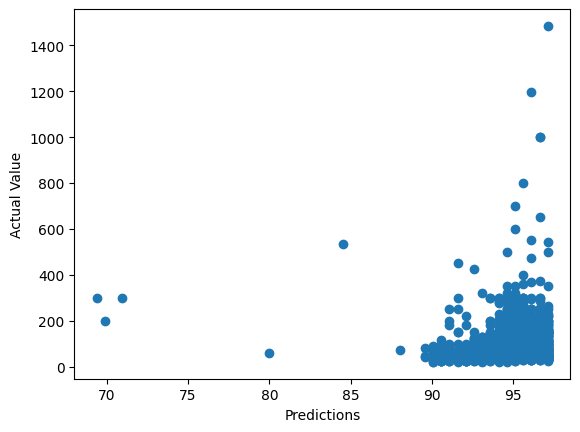

In [ ]:
plt.scatter(predictions, y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual Value')
plt.show()

#Task 6: Reccomendations

In [ ]:
df['model'].value_counts().head(5)

,count
model,
model 3,331
mustang,152
model s,130
wrangler,123
model x,114


###Suggest popular car models to stock based on rental trends.
*   Cars models Model 3, Model S, Model X and Mustang are the best model to stock on as they are more popular and generate the most revenue.




###Recommend marketing strategies to promote underutilized vehicles.


*   Look at vehicles that are more in demand, perform analysis to find common features and attributes among them to understand what makes them successful and see how those can be applied to underutilized vehicles.
*   Alternatively, introduce promotions, discounts, rewards or partner with other buisiness for vehicles models, types or makes that are underutilized.


###Are there opportunities to optimize pricing strategies or introduce more hybrid vehicles in certain cities?


*   Promoting hybrid vehicles in environments that are more environmental concious. It could be a great alternate for consumers that care about the environment but are enable to rent electric vehicles due to the price. In cities where electric vehicles are already in high demand the prices could be increase sligtly while keeping watch to ensure that the demand doesn't drop significantly after.

*   Hybrid vehicles could be also introduced in cities that aren't necessarily environmental concious. Customers might be more likely to rent them since the daily rate is close to that of gasoline and diesel car. Overtime some consumers may become more environmentally concious and may switch to electric thereby increasing profit.



#Conclusion

*   The linear regression did not perform as well as hoped. The shape of the prediction vs actual value plot indicates that there may be a non-linear relationship between the two variables.
*   The revenue was an estimation as the average price per model was use rather than the actual price.